# 2. Boundary Layer Flow and Forces

The previous topic discussed the difficulties of using the Navier-
Stokes equations. Before computer simulations were feasible, they
were of nearly no practical use. Instead, engineers used tables and
charts made up of experimental measurements, while academics
used potential flow theory to solve for beautiful flows which completely
disagreed with the experimental evidence.

![aerofoil.jpg](attachment:aerofoil.jpg)

For example, image above is one of the first visualizations ever taken of the real viscous flow over a foil at a high angle of attack. There is essentially no way to predict this flow flow analytically despite the flow being model-scale, and industry-scale applications are orders of magnitude more complex.

However, all is not lost. In 1904, Prandtl developed the technique of boundary-layer (BL) analysis, finally allowing for analytic predictions of viscous flow effects. While restricted to fairly simple situations, they are still of enormous utility for making high speed engineering estimates and (more importantly) in elucidating the fundamental mechanics of the viscous flow around aircraft, drones, ships, and many other vehicles and structures.

[__Note that Anderson covers viscous flow in _great_ detail in section Part 4 of Fundamentals of Aerodynamics. So much detail, in fact, that I recommend Frank White's Fluid Mechanics as a smaller, more "fundamental" version if that gets overwhelming__.]


## Boundary layer characteristics

![BLsketch.png](attachment:BLsketch.png)

Consider a body exposed to a flow with a relative velocity $U$. Molecular scale effects dominate at the interface between a solid and fluid. Regardless of how "smooth" the solid surface, it is rough at these scales and the fluid molecules will rebound with the average velocity of the more tightly packed solid. The net effect being that the fluid velocity very near the wall must match the body velocity; which is called the "no-slip" condition.

However, a low viscosity fluid cannot resist shear, and so the velocity rapidly increases, reaching the _external_ flow speed only a small distance $\delta$ away from the wall. These small length scales mean large velocity gradients and therefore viscous diffusion is important near the body.

In contrast, the external flow outside the boundary layer varies much more slowly, over length scales comparable to the body size $L$, meaning viscous effect can be ignored.  For aerodynamic and hydrodynamic flows around fairly streamlined bodies, we can decompose these two flow regions and consider them separately - enabling simple estimates of the flow and forces.

---

![Dns_schlierenimage.png](attachment:Dns_schlierenimage.png)

All boundary layers start as __laminar flow__ and transitions to [__turbulence__](https://arstechnica.com/science/2018/10/turbulence-the-oldest-unsolved-problem-in-physics/) along the length of a body if the Reynolds number is sufficiently large. Laminar and turbulent boundary layers are qualitatively different, with very different measured properties:
 - A laminar flow is characterized by smooth orderly fluid motion, without any mixing between layers (or _lamina_ ) of fluid and gradual changes along the length of the BL.
 - A turbulent flow is characterized by [mixing](https://www.youtube.com/watch?v=_UoTTq651dE), with elements of the fluid moving somewhat randomly throughout the boundary layer region.

The following code box imports the necessary libraries and also mounts the Google drive where some of the data files are stored. If you are running this notebook on a local machine then the you do not need lines 4 and 5 as they only required to run on google collab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EXAMPLE

In this example, we read two different files provided, where one is for a laminar boundary layer and another is for a turbulent boundary layer. These files give you wall-normal position (in mm) and the corresponding velocity (in m/s).

In this example, we will follow the definitions from the powerpoint slides and carry out the following calculations.

1. Plot the velocity profile for the laminar and turbulent boundary layers

2. Compute the boundary layer thickness ($\delta$) as the point where $U = 0.99U_\infty$. We do this using interpolation.

3. Plot the velocity profile in non-dimensional form, i.e. $U/U_\infty$ vs $y/\delta$.

4. Compute the wall-shear-stress by computing $\tau_w = \mu dU/dy$

5. Compute the local skin-friction coefficient ($C_f = \frac{2\tau_w}{\rho U^2_\infty}$)

Laminar BL thickness (mm): 2.161
Turbulent BL thickness (mm): 4.486


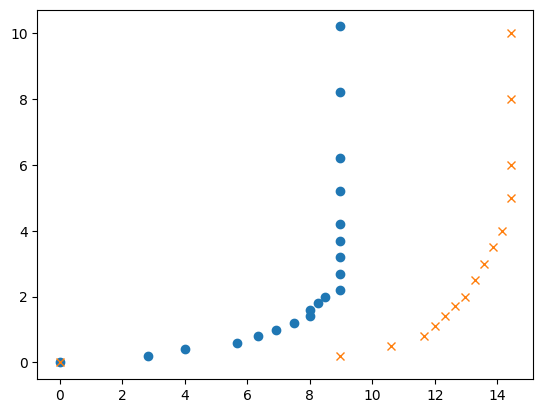

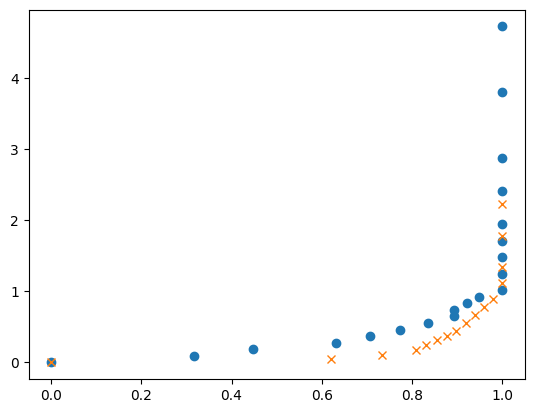

Laminar wall shear stress (Pa): 0.26530312500000003
Turbulent wall shear stress (Pa): 0.8389500000000001
Local skin-friction coefficient (Laminar): 0.005300694126610781
Local skin-friction coefficient (Turbulent): 0.006446491269776093


In [2]:
rho_air = 1.25
nu_air =1.5e-5
mu_air = rho_air*nu_air

laminar = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/SESA2022/laminar_profile.csv")
turbulent = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/SESA2022/turbulent_profile.csv")

aa,ab = laminar.columns # column names
ylam = laminar[aa]
ulam = laminar[ab]
Uinf_lam = ulam.max()#We get the freestream

aa,ab = turbulent.columns # column names

yturb = turbulent[aa]
uturb = turbulent[ab]
Uinf_turb = uturb.max()#We get the freestream

#PLot the velocity profile in dimensionbal units...
plt.figure(1)
plt.plot(ulam,ylam,'o',label='Laminar')
plt.plot(uturb,yturb,'x',label='Turbulent')

#Find the Boundary layer thickness
delta_lam = np.interp(0.99,ulam/Uinf_lam,ylam)
delta_turb = np.interp(0.99,uturb/Uinf_turb,yturb)

print("Laminar BL thickness (mm):",np.round(delta_lam,3))
print("Turbulent BL thickness (mm):",np.round(delta_turb,3))


#PLot the velocity profile in non-dimensionbal units...

plt.figure(2)
plt.plot(ulam/ulam.max(),ylam/delta_lam,'o',label='Laminar')
plt.plot(uturb/uturb.max(),yturb/delta_turb,'x',label='Turbulent')

plt.show()

#Calculate the gradient at the wall for wall-shear-stress
tau_w_lam = 1000*mu_air*(ulam[1]-ulam[0])/(ylam[1]-ylam[0])
tau_w_turb = 1000*mu_air*(uturb[1]-uturb[0])/(yturb[1]-yturb[0])

print("Laminar wall shear stress (Pa):",tau_w_lam)
print("Turbulent wall shear stress (Pa):",tau_w_turb)

#Calculate the skin-friction coefficient at the wall for wall-shear-stress

print("Local skin-friction coefficient (Laminar):",tau_w_lam/(0.5*rho_air*Uinf_lam*Uinf_lam))
print("Local skin-friction coefficient (Turbulent):",tau_w_turb/(0.5*rho_air*Uinf_turb*Uinf_turb))

## Example 2:

In this example, we compute the displacement and momentum thicknesses of the two different boundary layers.


### Momentum integral equation

![MIE.png](attachment:MIE.png)

To move beyond scaling arguments, we perform a control volume analysis over the boundary layer, starting from the leading edge and continuing up to a point $x$ for the special case of a flat plate geometry. In that case, the external flow is constant $u(\delta)=u_e=U$ and there is no pressure gradient. Note the top surface of the CV is the streamline which just touches the BL at $x$.

The conservation of momentum (per unit width) on this control volume is then

$$ D'(x) = \int_0^x \tau_w dx = \rho U^2 h - \int_0^\delta \rho u^2 dy $$

The drag up to location $x$ per unit width on one side of the plate, $D'(x)$, is equal to the integral of the __wall shear stress__ $\tau_w$. The second equality relates this to the difference in the momentum flux coming into the volume on the left (where $\rho u^2 = \rho U^2$) and leaving on the right. This CV equation is saying the same thing as the scaling argument above: the viscous forces are balanced by a momentum change inside the BL.

![thicknesses.png](attachment:thicknesses.png)

All of the terms in this equation depend on just a few properties of the boundary layer velocity profile $u(y)$.

 - The streamline height $h$ depends on the __displacement thickness__ $\delta^*$. In particular, $\delta^*=\delta-h$, measuring how far the streamlines are displaced away from the wall. Applying flux in=flux out leads to
 $$\delta^* = \delta-h = \int_0^\delta \left(1-\frac{u}{U} \right)\ dy $$
 - Finally, the last integral is related to the __momentum thickness__ $\theta$. We define this momentum thickness such that
 $$D'(x) = \rho U^2 \theta(x) $$
 Substitution into the CV equation then gives
 $$\theta = \int_0^\delta \frac{u}{U}\left(1-\frac{u}{U} \right)\ dy $$

Below are numerical estimates for the thicknesses and wall stress for our experimental velocity profile data:

In [3]:
#This function computes all boundar layer properties including
#displacement and momentum thicknesses as well as shape factor

def BLprop(u,y):
    Uinf = u.max()
    delta = np.interp(0.99,u/Uinf,y)
    tau_w = 1000*mu_air*(u[1]-u[0])/(y[1]-y[0])
    Cf = tau_w/(0.5*rho_air*Uinf*Uinf)

    dispt = np.trapz(1-u/u.max(),y)
    momt = np.trapz(u/u.max()*(1-u/u.max()),y)
    H = dispt/momt

    return [Uinf, delta, tau_w, Cf, dispt, momt, H]

[Uinf_lam,delta_lam,tau_w_lam,Cf_lam,dispt_lam,momt_lam,H_lam] = BLprop(ulam,ylam)
[Uinf_turb,delta_turb,tau_w_turb,Cf_turb,dispt_turb,momt_turb,H_turb] = BLprop(uturb,yturb)

print("Laminar - delta* (mm) = ",np.round(dispt_lam,4))
print("Laminar - theta (mm) = ",np.round(momt_lam,4))
print("Laminar - H = ",np.round(H_lam,4))

print("Turbulent - delta* (mm)= ",np.round(dispt_turb,4))
print("Turbulent - theta (mm) = ",np.round(momt_turb,4))
print("Turbulent - H = ",np.round(H_turb,4))

Laminar - delta* (mm) =  0.6252
Laminar - theta (mm) =  0.3047
Laminar - H =  2.0517
Turbulent - delta* (mm)=  0.6077
Turbulent - theta (mm) =  0.4099
Turbulent - H =  1.4826


### Skin-friction drag

Taking the $x$ derivative of the drag control volume equation gives $\tau_w = \rho U^2 \frac{d\theta}{dx}$.
Using this, we can relate the local boundary layer friction coefficient to the change in the momentum thickness:

$$ \frac 12 c_f = \frac{d\theta}{dx}$$

This is called the flat plate __momentum integral equation__ (MIE), which simply expresses that the wall friction causes the boundary layer (momentum) thickness to grow.

The MIE is an Ordinary Differential Equation (ODE), and those are easy to solve with integration. However, you need to already know the profile _shape_ in order to use this equation!

The friction drag per unit width on the plate up to length $x$ is $D'(x)=\rho U^2\theta(x)$ the _integrated_ friction drag coefficient along a plate of length $L$ is

$$C_F = \frac{D'}{\frac 12 \rho U^2 L}= \frac{2\theta(x= L)}{L}$$

Usually, a flat plate or an airfoil has two sides and you would typically double this coefficient.

This relationship is valid for laminar and turbulent flows!! But, the value of $\theta$ will be very differnet fo the two flows.

In [4]:
#This code compute the total viscous drag of a flat plate of length 30cm...
L = 0.3
CF_lam = 2*0.001*momt_lam/L
CF_turb = 2*0.001*momt_turb/L

#The plate
print("Total laminar viscous drag coefficient = ",2*CF_lam)
print("Total turbulent viscous drag coefficient = ",2*CF_turb)

Total laminar viscous drag coefficient =  0.004063309081921055
Total turbulent viscous drag coefficient =  0.0054652301615544865


## Example

### Plot CF vs Reynolds number for laminar flow

The total skin-friction of of a flat plate of length $c$ with laminar flow is given by,

$$C_F = \frac{1.328}{\sqrt{Re_c}}$$

Text(0, 0.5, 'Drag per unit length (N/m)')

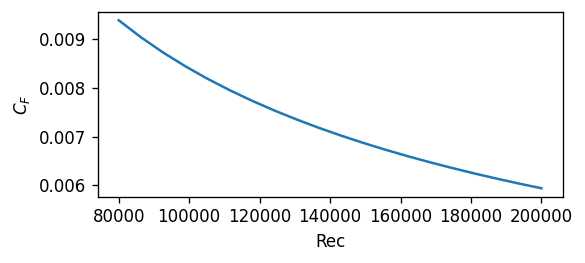

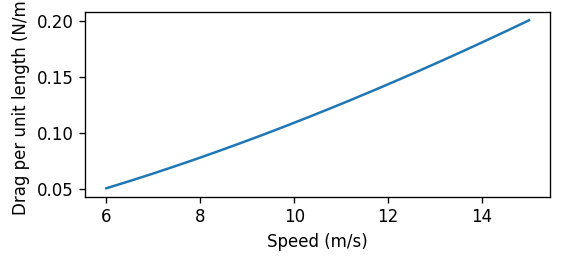

In [5]:
speed = np.linspace(6,15,20)
c = 0.2
b = 1.2
Rec = speed*c/nu_air

#There factor 2 is because there are two sides to the flat plate...
CF_l = 2*1.328/np.sqrt(Rec)

drag = 0.5*rho_air*speed*speed*b*c*CF_l

plt.figure(figsize=(5,2),dpi=120)       # make the plot
plt.plot(Rec,CF_l)
plt.xlabel('Rec')
plt.ylabel('$C_F$')

plt.figure(figsize=(5,2),dpi=120)       # make the plot
plt.plot(speed,drag)
plt.xlabel('Speed (m/s)')
plt.ylabel('Drag per unit length (N/m)')

## Example

### Turbulent profile

A simple power-law profile as discussed in the powerpoint slide would work for a turbulent flow.
$$ \frac{\overline u}U = \left(\frac y\delta \right)^{1/n} = \eta^{1/n} $$

where $n$ is an empirical factor that is determined from the data. Let's assume that n = 7 fits the data well, then, Substitution into the definition of $\delta^*$ and $\theta$ gives

$$ \frac{\delta^*}{\delta} = \int_0^1 (1-\eta^{1/7}) d\eta = \frac 18 ,\quad
\frac{\theta}{\delta} = \int_0^1 \eta^{1/7}(1-\eta^{1/7}) d\eta = \frac 7{72}
$$

Let's figure out if n = 7 works for our velocity profile for a turbulent flow:

0     0.000000
1     0.044578
2     0.111446
3     0.178314
4     0.245181
5     0.312049
6     0.378916
7     0.445784
8     0.557230
9     0.668676
10    0.780122
11    0.891568
12    1.114460
13    1.337352
14    1.783136
15    2.228920
Name: Wall distance (mm), dtype: float64
The value of n =  7.0


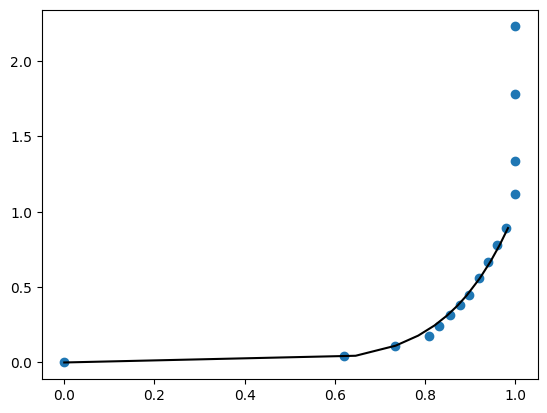

In [6]:
from scipy.optimize import curve_fit

#Let us define a function of the power law...
def func(yd,n):
    return  yd**(1/n)

#We only need to do the fitting till the edge of the boundary layer.
#Otherwise, the fitting will not work well.
#Let's find the first point at the edge of the boundary layer

print(yturb/delta_turb)

idx = np.where(yturb/delta_turb > 1)[0]
bl_idx = 12

#This is last index that is within the boundary layer...

#We use this curvefit to find "n" by only fitting within the boundary layer
popt, pcov = curve_fit(func,yturb[0:bl_idx]/delta_turb,uturb[0:bl_idx]/Uinf_turb)

n = popt[0]

print("The value of n = ",np.round(n))

plt.plot(uturb/Uinf_turb,yturb/delta_turb,'o')
plt.plot((yturb[0:bl_idx]/delta_turb)**(1/n),yturb[0:bl_idx]/delta_turb,'k-')

## Example

### Generalised skin-friction law

We typically use the relationship derived in lectures for various quantities such as momentum thickness, displacement thickness, local or total skin-friction. Sometimes, the data may not conform to theory and then you need to make a choice as to use the relationships or develop a new empirical law from the data.

Typically, we trust data (if we know all the uncertainties) as several assumptions go in to developing a theory.

Still, we need to assume a form of the law to derive from data.

For example, Let us consider total skin-friction of a plate of length $c$ in the turbulent regime:
$$CF = \frac{0.074}{Re^{0.2}_c}$$

This can be written in a generalised form as,
$$CF = A{Re^{b}_c}$$

where $A$ and $b$ are empirical factor that can be determined from the data.
For the theory $A = 0.074$ and $b = -0.2$.

0     100000
1     150000
2     200000
3     250000
4     300000
5     350000
6     400000
7     450000
8     500000
9     550000
10    600000
Name: Rec, dtype: int64
0     1.1253
1     1.0075
2     0.9929
3     1.0209
4     0.9300
5     0.9154
6     0.8419
7     0.8435
8     0.8394
9     0.7822
10    0.7672
Name: theta (mm), dtype: float64
Fitted value A =  0.0729
Fitted value b =  -0.1968


Text(0, 0.5, '$C_F$')

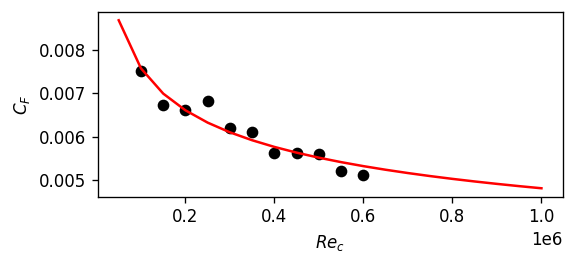

In [7]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/SESA2022/Rec_theta.csv")
aa,ab = data.columns
Rec_f = data[aa]
theta_f = data[ab]
print(Rec_f)
print(theta_f)
L = 0.3
CF_f = 2*0.001*theta_f/L

def func(Rec,A,b):
    return A*(Rec**b)

from scipy.optimize import curve_fit
params, pcov = curve_fit(func,Rec_f,CF_f)

A, b = params
print("Fitted value A = ",np.round(A,4))
print("Fitted value b = ",np.round(b,4))

Rec_sim = np.linspace(5e4,1e6,20)
CF_sim = func(Rec_sim,A,b)

plt.figure(figsize=(5,2),dpi=120)
plt.plot(Rec_f,CF_f,'ko')
plt.plot(Rec_sim,CF_sim,'r-')
plt.xlabel('$Re_c$')
plt.ylabel('$C_F$')


## Example

### Determine what part of the turbulent profile does y = 1mm lies...

We know that for $y^+ \leq 5$ is in the near-wall viscous sub-layer where velocity is $U^+ = y^+$ (near-wall region).

For, $y^+ > 50$ and $y/\delta \leq 0.2$, is in the log-region where velocit is $U^+ = \frac{1}{\kappa}lny^+ + B$ ($\kappa  = 0.4$ and $B = 5.0$).

Between, these two regions ( $5 \leq y^+ \leq 50$), the profile is in the buffer region.

Here, $y^+ = yU_\tau/\nu$.

So, to determine which region the location is in, we need to compute the value of $U_\tau$. We know that $U_\tau = \sqrt{\tau_w/\rho}$. We can re-arrange this and show that:

$$\frac{U^2_\tau}{U^2_\infty} = \frac{C_f}{2}$$

We already know $C_f$ because we calculated it for the turbulent profile...

$$U_\tau = U_\infty\sqrt{\frac{C_f}{2}}$$

In [8]:
ymm = 1e-3

tau_w_turb = 1000*mu_air*(uturb[1]-uturb[0])/(yturb[1]-yturb[0])
Cf_turb = tau_w_turb/(0.5*rho_air*Uinf_turb*Uinf_turb)

Utau_turb = Uinf_turb*np.sqrt(0.5*Cf_turb)

L = 0.3 #Length of the flat plate
ReL_turb = Uinf_turb*L/nu_air #Reynolds number at the location
Cf_turb_pred = 0.059/(ReL_turb**0.2)
Utau_turb_pred = Uinf_turb*np.sqrt(0.5*Cf_turb_pred)

print("Utau based on data: ",np.round(Utau_turb,3))
print("Utau based on prediction: ",np.round(Utau_turb_pred,3))

yplus = ymm*Utau_turb/nu_air
yplus_pred = ymm*Utau_turb_pred/nu_air

ydelta =ymm/(0.001*delta_turb)
#multiply by 0.001 in demoninator to convert to m

print("yplus at 1mm based on data = ",np.round(yplus))
print("yplus at 1mm based on prediction = ",np.round(yplus_pred))

print("y/delta at 1mm =", np.round(ydelta,1))

Utau based on data:  0.819
Utau based on prediction:  0.705
yplus at 1mm based on data =  55.0
yplus at 1mm based on prediction =  47.0
y/delta at 1mm = 0.2


## Example

### Transition and the virtual turbulent origin

A boundary layer transitions to turbulence between $Re_x=3\times 10^5$ and $Re_x=10^6$ depending on other factors such as wall roughness and upstream conditions. This means that the beginning of every turbulent boundary layer is laminar. If that laminar region is a significant fraction of the length of the plate, applying the fully turbulent equations above to the full plate length will overestimate the BL size and drag.

The simplest technique to account for this is to assume an idealized transition from pure laminar to pure turbulent flow, and to assume the _momentum thickness is continuous_ across this transition. This is a reasonable option since a boundary layer grows gradually due to momentum loss due to friction.  

We can derive an equation for the virtual origin using the momentum thickness for turbulent and laminar flow:
\begin{gather}
\frac{\theta_\text{lam}(x)} x = 0.664 Re_x^{-1/2}\\
\frac{\theta_\text{turb}(x)} {x-x_0} = 0.037 Re_{x-x_0}^{-1/5} \\
\end{gather}

Let's see if there is a virtual origin for the turbulent boundary layer data that we have...

In [9]:
from scipy.optimize import fsolve
from scipy.optimize import bisect

L = 0.3

#This function equates the momentum thickness computed numerically
#to that computed using the above formula with a virtual origin
def virtual_origin(x0):
    return  0.001*momt_turb - (L-x0)*0.037*((Uinf_turb*(L-x0)/nu_air)**(-0.2))

x0 = fsolve(virtual_origin,0.1)

x0b = bisect(virtual_origin,0,0.8*L)


print("Virtual origin distance from the leading edge (m) using fsolve:",np.round(x0,3))
print("Virtual origin distance from the leading edge (m) using bisect:",np.round(x0b,3))


Virtual origin distance from the leading edge (m) using fsolve: [0.187]
Virtual origin distance from the leading edge (m) using bisect: 0.187


In [10]:
#This function equates the momentum thickness computed numerically
#to that computed using the above formula with a virtual origin
def transition_point(xt):
    return   xt*0.664*((Uinf_turb*xt/nu_air)**(-0.5)) - (xt-x0)*0.037*((Uinf_turb*(xt-x0)/nu_air)**(-0.2))

xt = fsolve(transition_point,L)[0]

Rext = xt*Uinf_turb/nu_air

print("Transition location from the leading edge (m):",np.round(xt,3))
print("Reynolds number at transiton: ",np.round(Rext))

Transition location from the leading edge (m): 0.283
Reynolds number at transiton:  272478.0


In [11]:
#Check the value of virtual origin computed against empirical evidence
x0_n = xt*(1-38*Rext**(-3/8))

print("Virtual origin distance from the leading edge from correlation (m):",np.round(x0_n,3))

Virtual origin distance from the leading edge from correlation (m): 0.185
